<a href="https://colab.research.google.com/github/PalmerTurley34/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/132_Asgmt_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [50]:
# mean
mean = sum(sales)/len(sales)
print('mean:', mean)

# check work
import numpy as np
np.mean(sales)

mean: 3052.714285714286


3052.714285714286

In [51]:
# variance
def sub_mean(number):
  return number - mean

# calculate distances from the mean
distances = list(map(sub_mean, sales))

# square distances
squared = list(map(lambda x: x**2, distances))

# divide by list length
variance = sum(squared)/(len(squared))
print('variance:', variance)
np.var(sales)


variance: 183761.06122448976


183761.06122448976

In [52]:
# standard deviation
sales_std = variance**.5
print('Standard deviation:', sales_std)
np.std(sales)

Standard deviation: 428.67360686714756


428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [54]:
# covariance
covariance = np.cov(sales, customers)[0][1]
print(np.cov(sales, customers), '\n')
print('covariance:', covariance)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]] 

covariance: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [55]:
#sales std
mean = sum(sales)/len(sales)
distances = list(map(lambda x: x-mean, sales))
squared = list(map(lambda x: x**2, distances))
variance = sum(squared)/(len(squared)-1)
sales_std = variance**.5

# customers std
mean = sum(customers)/len(customers)
distances = list(map(lambda x: x-mean, customers))
squared = list(map(lambda x: x**2, distances))
variance = sum(squared)/(len(squared)-1)
customers_std = variance**.5

print(sales_std, '\n', customers_std)

463.0204150595357 
 17.057326313123664


In [56]:
# correlation coefficient
correlation = covariance/(sales_std*customers_std)
print(correlation)

0.9628339778148909


In [57]:
# check work
sales_std = df['Sales'].std(ddof=1)
customers_std = df['Customers'].std(ddof=1)
sales_std, customers_std

(463.0204150595357, 17.057326313123664)

In [36]:
import pandas as pd
df = pd.DataFrame({'Sales': sales, 'Customers': customers})
df.corr()

,Sales,Customers
Sales,1.000000,0.962834
Customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [63]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [64]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

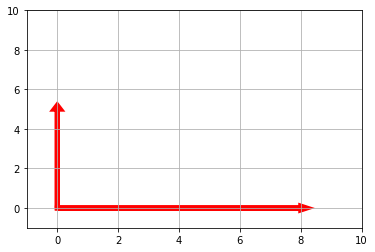

In [67]:
# synonym for orthoganal is perpendicular

a = np.array([0,5])
b = np.array([8,0])

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.grid()
plt.xlim(-1,10)
plt.ylim(-1,10)
for vector in [a,b]:
  plt.arrow(0,0, *vector, head_width=.2, head_length=0.2, linewidth=5, color='r');



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [69]:
# vectors whose dot product is equal to zero are orthogonal
a = np.array([-5,3,7])
b = np.array([6,-8,2])
a.dot(b)
# they are not orthogonal

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [77]:
# they are all the same value because they are all the sum of all the values squared
c = np.array([2,-15,6,20])
norm_squared = (np.linalg.norm(c))**2
dot_product = c.dot(c)
transposed = np.matmul(c.T, c)
print(norm_squared, '\n', dot_product, '\n', transposed)

665.0 
 665 
 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [85]:
f = np.array([4,12,11,9,2])

f_hat = f/np.linalg.norm(f)
print(f_hat, '\n', np.linalg.norm(f_hat))


[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167] 
 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

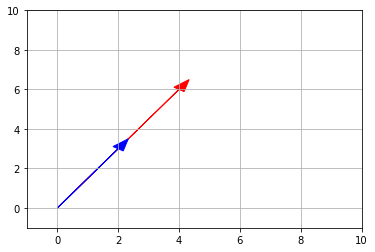

In [91]:
# linearly dependent
a = np.array([2,3])
b = np.array([4,6])

fig, ax = plt.subplots()
plt.grid()
plt.xlim(-1,10)
plt.ylim(-1,10)

plt.arrow(0,0, *b, head_width=.4, color='r')
plt.arrow(0,0, *a, head_width=.4, linewidth=1, color='b');

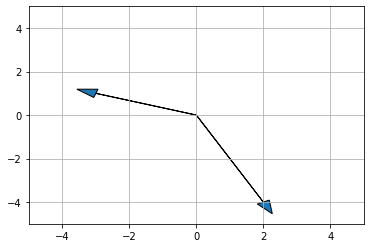

In [94]:
# linearly independent
c = np.array([2,-4])
d = np.array([-3,1])

fig, ax = plt.subplots()
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)

for vector in [c,d]:
  plt.arrow(0,0, *vector, head_width=.4)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# the two vectors are linearly dependent meaning the span of the two vectors is
# either of the vectors scaled by any number

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# these vectors are not linearly dependent so their span is all of 3-dimensional space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



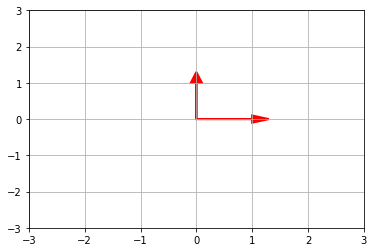

In [100]:
# orthonormal basis
a= np.array([1,0])
b = np.array([0,1])

fig, ax = plt.subplots()
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)

for vector in [a,b]:
  plt.arrow(0,0, *vector, head_width=.2, linewidth=2, color='r');

## 6.2 What does it mean to form a basis?

Forming a basis means we have a set of vectors that, if scaled by any number, would span all of the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [102]:
# the rank of p is 3
p = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

Rank is the dimension of the vector span of the columns. Basically, if each column of a matrix is a vector, what dimensional space would those vectors span.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

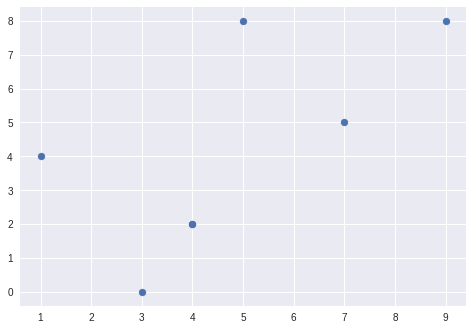

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()